## Week 12 Assignment - W200 Python Fundamentals for Data Science, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class.

This homework assignment is Week 12 which corresponds to the Unit #11 async. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. (Apologies for the confusion)

## Objectives

- Explore and get insights from a real dataset using pandas
- Practice the use of pandas for: exploratory analysis, information gathering and discovery
- Use matplotlib for plotting charts from the data

## Data files

In this assignment you will apply what you are learning to answer questions about campaign contributions in the Democratic presidential primary race. We will use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You will need to download and save the csv in the same folder as this notebook. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

** REMEMBER -- DO NOT PUT THIS DATA IN YOUR GITHUB REPO ! **

Documentation for this data file can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it contains errors and other pecularities to work through
- The data is ~218mb which will take some time to load (and probably won't load in google sheets or Excel)
- If you make assumptions please annotate them in your answer
- While we've left one code/markdown cell for you after each question as a placeholder, some of your answers will require multiple cells to fully respond
- Double click the markdown cells where it says YOUR ANSWER HERE to enter your written answers; if you need more cells to write answers in please make them markdown cells (rather than code cells)

## Setup

First, run the two cells below. 

The first cell will load in the data to a pandas dataframe named 'contrib'. Note we define a custom date parser to speed up import (we could have Python guess the date format, but this can make the load a lot slower).  

The second cell subsets the data to look at the primary period.  Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.  We will analyze through May 2016.

In [97]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates = ['contb_receipt_dt'], date_parser=d)

# Note - for now, it is okay to ignore the warning about mixed types.  

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
# Subset data to primary period 
print(contrib.shape)

contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(1125659, 18)
(654502, 18)


## 1. Data Exploration

**1a.** First, let's take a preliminary look at our data:
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this dataset (linked above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the "election_tp" variable contain?

In [3]:
# YOUR CODE HERE
print(contrib.shape, end = '\n\n') 
# 18 variables/columns/features and 654502 rows

print([cols for cols in contrib.columns], end = '\n\n')

(654502, 18)

['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp']



- 1a YOUR ANSWER HERE

Yes, I have all the columns from the documentation for the dataset linked above.

election_tp : the election type variable contains what type the election was in a string format.
The election types can be P = primary, C = convention, E = recount, and etc. 

**1b.** Print out the first 5 observations from the dataset to manually look through some of your data.

In [99]:
# YOUR CODE HERE
contrib.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c.** When working with a new dataset, it is important to explore and sanity check your variables. Pick **three** variables from the dataset above and run some quick sanity checks. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use markdown cells to explain if your sanity checks "pass" your scrutiny or if you have concerns about the integrity of your data. 

In [100]:
# YOUR CODE HERE
print('max contribution receipt amount: ' + str(max(contrib['contb_receipt_amt'])))
print('min contribution receipt amount: ' + str(min(contrib['contb_receipt_amt'])), end = '\n\n')

print('# of missing values in candidate name: ' + str(sum(contrib['cand_nm'].isnull())), end = '\n\n')

print('# of missing values in occupation of the contributor: ' + str(sum(contrib['contbr_occupation'].isnull())))

max contribution receipt amount: 10800.0
min contribution receipt amount: -10000.0

# of missing values in candidate name: 0

# of missing values in occupation of the contributor: 5194


- 1c YOUR ANSWER HERE

For the contribution amount, I am bit skeptical of the data since the minimum contribution amount is -10000.00.  My assumption for the minimum contribution amount was an amount of 0.0, not a negative number.

The candidate name feature does pass my sanity check that there are no null/missing values.  I used the .isnull() method to check if there were any candidate names missing, but as with my assumption no values are missing

The occupation of the contributor contains the occupation title of the contributor. Not aligned with my assumption, there are 5194 missing values in this feature meaning 5194 contributors either did not include their occupation or the data was not inputed into the dataset.

## 2. Exploring Campaign Contributions

Let's investigate the donations to the candidates.

**2a.** 
Create a table that shows the total number of donations to each candidate. Hint: use "groupby" as shown in async unit 11.07.

When presenting data in a table, it is best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to get insights out of your tables. Use "sort_values" to sort the data so that candidates with the largest number of donations appear on top. From now on, all tables you present in this assignment (and course) should be sorted.

What candidate recieved the largest number of contributions (variable 'contb_receipt_amt')?

In [101]:
total_number_donations = contrib.groupby('cand_nm')['contb_receipt_amt'].count().sort_values(ascending = False).to_frame()
total_number_donations.head()

,contb_receipt_amt
cand_nm,
"Sanders, Bernard",371795
"Clinton, Hillary Rodham",163509
"Cruz, Rafael Edward 'Ted'",57136
"Carson, Benjamin S.",27342
"Rubio, Marco",14089


In [102]:
contrib.groupby('cand_nm')['contb_receipt_amt'].count().sort_values(ascending = False).index[0]


'Sanders, Bernard'

- 2a YOUR ANSWER HERE

Sanders, Bernard

**2b.** Now, create a table that shows the total **value** of donations to each candidate. What candidate raised the most money in California?

In [103]:
# YOUR CODE HERE
ca_only = contrib.loc[contrib['contbr_st'] == 'CA', :]
total_value_donations = ca_only.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending = False).to_frame()
total_value_donations.head()

,contb_receipt_amt
cand_nm,
"Clinton, Hillary Rodham","39,368,777.01"
"Sanders, Bernard","18,773,871.31"
"Cruz, Rafael Edward 'Ted'","6,286,460.34"
"Rubio, Marco","4,846,483.72"
"Bush, Jeb","3,325,536.83"


- 2b YOUR ANSWER HERE

Clinton, Hillary Rodham

**2c.** Combining your tables
- What is the "type" of the two tables you printed above? Show if they are Series, or DataFrames.
- Convert any Series to pandas DataFrames.
- Update the variable (column) names to accurately describe what is shown
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table. Use the "join" function.

In [12]:
# YOUR CODE HERE
print('total number of donations type:\t ' + str(type(total_number_donations)))
print('total value of donations type:\t ' + str(type(total_value_donations)))

total number of donations type:	 <class 'pandas.core.frame.DataFrame'>
total value of donations type:	 <class 'pandas.core.frame.DataFrame'>


In [104]:
total_number_donations = total_number_donations.rename({'contb_receipt_amt': 'total_count_of_donations'}, axis = 'columns')
total_number_donations.head()

,total_count_of_donations
cand_nm,
"Sanders, Bernard",371795
"Clinton, Hillary Rodham",163509
"Cruz, Rafael Edward 'Ted'",57136
"Carson, Benjamin S.",27342
"Rubio, Marco",14089


In [107]:
total_value_donations = total_value_donations.rename({'contb_receipt_amt': 'total_value_of_donations'}, axis = 'columns')
total_value_donations.head()

,total_value_of_donations
cand_nm,
"Clinton, Hillary Rodham","39,368,777.01"
"Sanders, Bernard","18,773,871.31"
"Cruz, Rafael Edward 'Ted'","6,286,460.34"
"Rubio, Marco","4,846,483.72"
"Bush, Jeb","3,325,536.83"


In [108]:
joined_dataframe = total_number_donations.join(total_value_donations, how = 'left')
joined_dataframe.head()

,total_count_of_donations,total_value_of_donations
cand_nm,,
"Sanders, Bernard",371795,"18,773,871.31"
"Clinton, Hillary Rodham",163509,"39,368,777.01"
"Cruz, Rafael Edward 'Ted'",57136,"6,286,460.34"
"Carson, Benjamin S.",27342,"2,952,109.00"
"Rubio, Marco",14089,"4,846,483.72"


**2d.** Calculate and add a new variable to your table that shows the average $ per donation.

In [109]:
joined_dataframe['average_$_per_donations'] = joined_dataframe['total_value_of_donations']/joined_dataframe['total_count_of_donations']
joined_dataframe.head(10)

,total_count_of_donations,total_value_of_donations,average_$_per_donations
cand_nm,,,
"Sanders, Bernard",371795,"18,773,871.31",50.50
"Clinton, Hillary Rodham",163509,"39,368,777.01",240.77
"Cruz, Rafael Edward 'Ted'",57136,"6,286,460.34",110.03
"Carson, Benjamin S.",27342,"2,952,109.00",107.97
"Rubio, Marco",14089,"4,846,483.72",343.99
"Fiorina, Carly",4696,"1,468,489.42",312.71
"Paul, Rand",4256,"797,624.29",187.41
"Bush, Jeb",3114,"3,325,536.83","1,067.93"
"Kasich, John R.",2988,"1,553,823.54",520.02


**2e.** There are several interesting conclusions you can draw from the table you have created. Please comment on the results of your data analysis in a short paragraph. What have you learned about campaign contributions in California?

- 2e YOUR ANSWER HERE

An interesting conclusion drawn from the dataframe created above is the column average dollar per donations.  We can see that candidate Sanders, Bernard recieved the highest amount of contributions by over double the second closest candidate Clinton, Hillary Rodham.  However, although she recieved far fewer donations, the amount per donation average is much higher (almost 5 times) the amount of Sanders, Bernard.  Also candidate Bush, Jeb recieved far few donations but his average dollar per donation is quite high.  It be seen that both the amount of donations and average_$_per_donations amount are what is necessary for a candidate to receive the highest contributon amount.

## 3. Exploring Donor Occupation

Above in part 2, we saw that some simple data analysis can give us insights into the campaign of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the "contbr_occupation" variable.

**3a.** Subset your data to create a data frame with only donations for Hillary Clinton. Then use value_counts() and head() to display the top 5 occupations (contbr_occupation) for her donors. Note: we are just interested in the count of donations, not the value of those donations.

In [110]:
hillary_clinton = contrib.loc[contrib['cand_nm'] == 'Clinton, Hillary Rodham', :]
hillary_clinton['contbr_occupation'].value_counts().head()

RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64

- 3a YOUR ANSWER HERE

RETIRED                  33450

ATTORNEY                  7315

INFORMATION REQUESTED     4742

TEACHER                   3591

HOMEMAKER                 3436

**3b.** Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.  Specifically, write a function called get_donors() that takes a DataFrame as input, and outputs a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [111]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # YOUR CODE HERE
    return df['contbr_occupation'].value_counts().head()

**3c.** Now try running your function on subsets of the dataframe corresponding to three candidates:
    1. Hillary Clinton
    2. Bernie Sanders
    3. Donald Trump

In [112]:
# YOUR CODE HERE
hillary_clinton = contrib.loc[contrib['cand_nm'] == 'Clinton, Hillary Rodham', :]
bernie_sanders = contrib.loc[contrib['cand_nm'] == 'Sanders, Bernard', :]
donald_trump = contrib.loc[contrib['cand_nm'] == 'Trump, Donald J.', :]

print(get_donors(hillary_clinton), end = '\n\n')
print(get_donors(bernie_sanders), end = '\n\n')
print(get_donors(donald_trump))

RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64

NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contbr_occupation, dtype: int64

RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
Name: contbr_occupation, dtype: int64


**3d.** Finally, use a groupby to divide the entire dataset by candidate.  Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.  Look at your output and marvel at what Pandas can do in just one line!

In [113]:
# YOUR CODE HERE
contrib.groupby('cand_nm').apply(get_donors)

cand_nm                                                          
Bush, Jeb                  RETIRED                                     996
                           HOMEMAKER                                   180
                           ATTORNEY                                     92
                           Q.A.                                         89
                           PRESIDENT                                    84
Carson, Benjamin S.        RETIRED                                   13692
                           INFORMATION REQUESTED PER BEST EFFORTS     1614
                           HOMEMAKER                                  1049
                           PHYSICIAN                                   329
                           R.N.                                        234
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your findings in a short paragraph.

- 3e YOUR ANSWER HERE

An interesting conclusion discovered the groupby dataset is the type of contributor occupation.  For example, Donald Trump is a candidate that has a contribution type of president, meaning he provided his own contributions or that past presidents contributed to his campaign.  Also Bernie Sanders campaign spoke to many young millenials, which is shown by the amount of software engineers and engineers that donated to his campaign.  Hillary Clinton on the otherhand spoke to an older generation which is shown by the amount of retired, homemaker, and teachers that contributed to her campaign.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. Do you have any new insights into the results you got in section 2, now that you see the top occupations for each candidate?

- 3f YOUR ANSWER HERE

Yes, the results in section 2 and the results in section 3 go hand in hand.  Hillary Clinton recieved the most amount of contributions (value-wise) in section 2 and in section 3 it was shown that many of her contributors are retired.  I am assuming that individuals who are retired have enough to money to not only support themselves but also have extra to support a candidate they prefer.  Bernie Sanders recieved the most contributions by count and his contributions came also from retired individuals and also engineers.  It seems that Bernie was reaching a broader audience which could be why he did indeed receive the highest amount of contributions (count-wise).


## 4. Plotting Data

There is an important element that we have not yet explored in this dataset - time.

**4a.** Please create a single line chart with the following elements:
- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

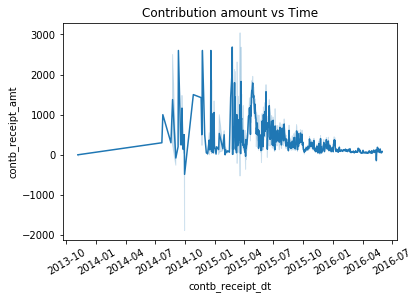

In [114]:
# YOUR CODE HERE
import seaborn as sn

ax = sn.lineplot(x = 'contb_receipt_dt', y = 'contb_receipt_amt', data = contrib)
for labels in ax.get_xticklabels():
    labels.set_rotation(30)
ax.set_title('Contribution amount vs Time');

**4b.** This chart is messy (and you should make better plots for your project). While there are better ways we can show this data, what conclusions can you draw from just your basic plot?

- 4b YOUR ANSWER HERE

From the plot above, we can see that the amount of contributions decreases as time goes on.  We see that in late 2014 to mid 2015, contribution amounts are quite high.  Hoever, as we go into late 2015 and all through 2016, the contribution amounts decrease drastically, just slightly hovering above 0.

**4c.** Brainstorm: If you were going to improve on this plot looking at donations over time, what could you display that would be more useful? You do not need to do any plotting for this question.

- 4c YOUR ANSWER HERE

If I were going to improve this plot looking at donations over time, I could diplay the total value amount for a given year rather than for individual months.  It would be easier and more clear to see if the amounts being contributed were going down yearly compared to monthly if we summed the amounts by year. 

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k